In [6]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

In [7]:
tf.__version__

'2.3.1'

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# x_data = [[0, 0],
#           [0, 1],
#           [1, 0],
#           [1, 1]]

# y_data = [0,
#           0,
#           0,
#           1]

x_data = np.array([[1, 2], [1, 5], [2, 2], [3, 3.5], [7, 5], [9, 4], [8, 2]]) #training_points
y_data = [1, 1, 1, 1, 0, 0, 0]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [10]:
x_data.shape, y_data.shape

((7, 2), (7,))

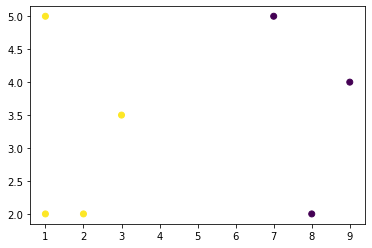

In [11]:
plt.scatter(x_data[:, 0], x_data[:, 1], c=y_data)

In [12]:
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import optimizers
from tensorflow.keras import models

In [13]:
model = models.Sequential()
model.add(layers.Dense(2, input_dim=2))
model.add(layers.Activation('tanh'))
model.add(layers.Dense(1))
model.add(layers.Activation('sigmoid'))

In [14]:
sgd = optimizers.SGD(lr=0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_and.png', show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [17]:
history = model.fit(x_data, y_data,  batch_size=1, epochs=500)

Epoch 1/500
7/7 [==============================] - 0s 570us/step - loss: 0.5788 - accuracy: 0.5714
Epoch 2/500
7/7 [==============================] - 0s 430us/step - loss: 0.3346 - accuracy: 0.8571
Epoch 3/500
7/7 [==============================] - 0s 571us/step - loss: 0.5584 - accuracy: 0.7143
Epoch 4/500
7/7 [==============================] - 0s 430us/step - loss: 0.3983 - accuracy: 0.8571
Epoch 5/500
7/7 [==============================] - 0s 659us/step - loss: 0.2992 - accuracy: 0.8571
Epoch 6/500
7/7 [==============================] - 0s 571us/step - loss: 0.4742 - accuracy: 0.7143
Epoch 7/500
7/7 [==============================] - 0s 572us/step - loss: 0.2124 - accuracy: 1.0000
Epoch 8/500
7/7 [==============================] - 0s 571us/step - loss: 0.1894 - accuracy: 1.0000
Epoch 9/500
7/7 [==============================] - 0s 571us/step - loss: 0.2502 - accuracy: 0.8571
Epoch 10/500
7/7 [==============================] - 0s 572us/step - loss: 0.1329 - accuracy: 1.0000
Epoch 11/

Text(0.5, 0, 'epoch')

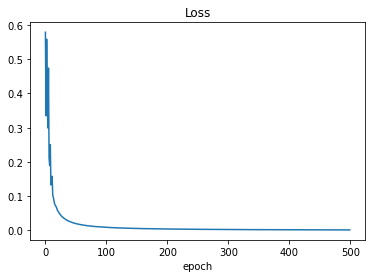

In [18]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

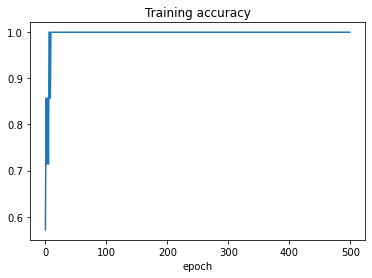

In [19]:

plt.plot(history.history['accuracy'])
plt.title('Training accuracy')
plt.xlabel('epoch')

In [20]:

hypothesis = model.predict(x_data)
print(hypothesis)

[[0.99920154]
 [0.99929637]
 [0.99701905]
 [0.99896526]
 [0.0026955 ]
 [0.00150269]
 [0.00150225]]


In [21]:
predicted = hypothesis > 0.5
print(predicted)

[[ True]
 [ True]
 [ True]
 [ True]
 [False]
 [False]
 [False]]
